# Import libraries et chargement des datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data1 = pd.read_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\eco2mix-regional-cons-def.csv",sep=";")
data2 = pd.read_excel(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\pop entre 2016 et 2022.xlsx")
data3 = pd.read_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\temperature-quotidienne-regionale (2).csv",sep=";")

In [6]:
data2.shape

(91, 3)

In [8]:
data2.columns

Index(['Régions', 'annee', 'Total'], dtype='object')

In [12]:
data2.isna().sum()

Régions    0
annee      0
Total      0
dtype: int64

## Code de cour
(Ne pas prêter attention)

In [34]:
"""data.shape, data.columns, data.head(), data.describe, data.isna().sum()
data.fillna(data['age'].mean()), data.dropna(axis=0)
data2.groupby(['annee', 'Régions']).mean(), data2=data2.set_index('Régions')
"""

"data.shape, data.columns, data.head(), data.describe, data.isna().sum()\ndata.fillna(data['age'].mean()), data.dropna(axis=0)\ndata2.groupby(['annee', 'Régions']).mean(), data2=data2.set_index('Régions')\n"

# Data2

In [37]:
data2.shape

(91, 3)

In [39]:
data2.columns

Index(['Régions', 'annee', 'Total'], dtype='object')

In [41]:
data2.rename(columns={"Régions": "region"}, inplace=True)

In [43]:
data2.replace({"region": {"Centre-Val-de-Loire": "Centre-Val de Loire"}}, inplace=True)

In [45]:
data2.head()

,region,annee,Total
0,Auvergne-Rhône-Alpes,2022,8156391
1,Bourgogne-Franche-Comté,2022,2791006
2,Bretagne,2022,3412207
3,Centre-Val de Loire,2022,2572636
4,Corse,2022,348830


In [47]:
data2.describe()

,annee,Total
count,91.00000,9.100000e+01
mean,2019.00000,5.017946e+06
std,2.01108,2.850709e+06
min,2016.00000,3.304550e+05
25%,2017.00000,3.319324e+06
50%,2019.00000,5.098666e+06
75%,2021.00000,6.008246e+06
max,2022.00000,1.232943e+07


## data2_1: moyenne population par region
## data2_2: graphique

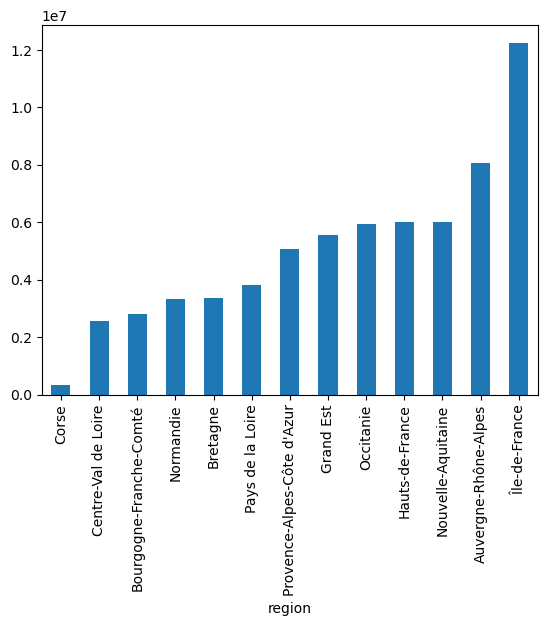

In [50]:
data2_1 = data2.groupby("region").mean().Total.sort_values()
data2_2 = data2_1.plot(kind="bar")

# Data3

In [53]:
data3.shape

(33943, 7)

In [55]:
data3.columns

Index(['id', 'date', 'code_insee_region', 'region', 'tmin', 'tmax', 'tmoy'], dtype='object')

In [57]:
data3.describe()

,code_insee_region,tmin,tmax,tmoy
count,33943.000000,33943.000000,33943.000000,33943.000000
mean,53.307692,8.378780,17.752754,13.065799
std,27.291947,5.917313,7.688100,6.566472
min,11.000000,-11.980000,-3.750000,-6.480000
25%,28.000000,3.970000,11.940000,8.140000
50%,52.000000,8.300000,17.290000,12.580000
75%,76.000000,12.960000,23.450000,18.100000
max,94.000000,24.200000,41.680000,32.700000


## data3_1: moyenne population par region
## data3_2: graphique

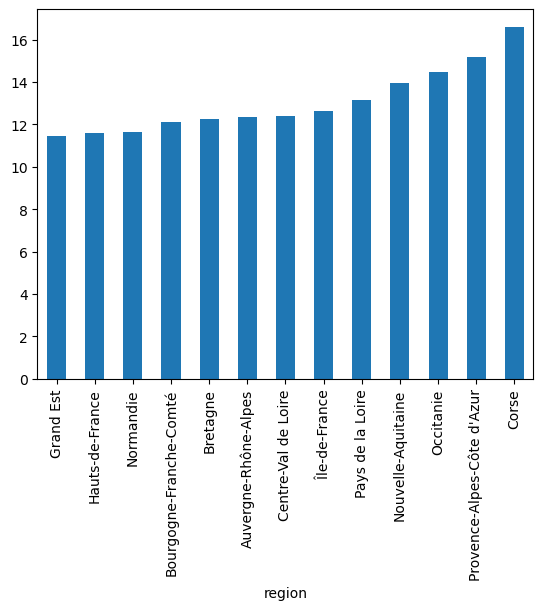

In [60]:
data3_1 = data3.groupby("region").mean(numeric_only=True).tmoy.sort_values()
data3_2 = data3_1.plot(kind="bar")

## Data1

In [62]:
data1.rename(columns={"Région": "region",'Code INSEE région': 'Code INSEE region'}, inplace=True)

## Data4: Le merge de (data1 & data2_1 & data3_1)

In [66]:
data4 = pd.merge(data2_1, data3_1, on='region', how='inner')
data4 = pd.merge(data1, data4, on='region', how='inner')

In [67]:
data4[:2]

,Code INSEE region,region,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Total,tmoy
0,44,Grand Est,Données consolidées,2021-01-11,14:00,2021-01-11T14:00:00+01:00,7403.0,2227.0,9175.0,356.0,...,23.99,1.58,48.55,NaN,NaN,NaN,NaN,NaN,5.572013e+06,11.448234
1,44,Grand Est,Données consolidées,2021-01-11,23:00,2021-01-11T23:00:00+01:00,6544.0,2148.0,9127.0,1963.0,...,22.74,1.80,48.96,NaN,NaN,NaN,NaN,NaN,5.572013e+06,11.448234


## Ajustement colonnes & compréhension

In [69]:
data4 = data4.drop(['Code INSEE region', 'Nature', 'Column 30'], axis=1)

In [71]:
#data4.columns

In [72]:
data4.shape

(1980288, 31)

In [77]:
#(data4.isna().sum()/data4.shape[0]*100).round(2)

# TCO & TCH

In [80]:
tab_TCO = ['TCO Thermique (%)', 'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)']
tab_TCH = ['TCH Thermique (%)', 'TCH Nucléaire (%)', 'TCH Eolien (%)', 'TCH Solaire (%)', 'TCH Hydraulique (%)', 'TCH Bioénergies (%)']

In [82]:
data4[tab_TCO].isna().sum()

TCO Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCO Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
dtype: int64

In [84]:
data4[tab_TCH].isna().sum()

TCH Thermique (%)      1472256
TCH Nucléaire (%)      1582176
TCH Eolien (%)         1472256
TCH Solaire (%)        1472256
TCH Hydraulique (%)    1716480
TCH Bioénergies (%)    1716480
dtype: int64

In [86]:
data4.columns

Index(['region', 'Date', 'Heure', 'Date - Heure', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
       'TCO Bioénergies (%)', 'TCH Bioénergies (%)', 'Total', 'tmoy'],
      dtype='object')

In [88]:
data_FINAL = data4.drop(tab_TCH, axis=1)
data_FINAL = data_FINAL.drop(['Heure', 'Date - Heure', 'Pompage (MW)', 'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)'], axis=1)
data_FINAL.columns

Index(['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [89]:
data_FINAL.shape

(1980288, 16)

## TCO : Taux de Consommation Optimisé

In [93]:
data_TCO = data4.drop(tab_TCH, axis=1)
data_TCO = data_TCO.drop(['Date', 'Heure', 'Date - Heure'], axis=1)
data_TCO = data_TCO.drop(['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)'], axis=1)
data_TCO = data_TCO.drop(['Stockage batterie', 'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore'], axis=1)

In [94]:
data_TCO.columns

Index(['region', 'TCO Thermique (%)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [95]:
data_TCO.describe()

,TCO Thermique (%),TCO Nucléaire (%),TCO Eolien (%),TCO Solaire (%),TCO Hydraulique (%),TCO Bioénergies (%),Total,tmoy
count,508032.000000,398112.000000,508032.000000,508032.000000,263808.000000,263808.000000,1.980288e+06,1.980288e+06
mean,8.393588,55.843971,9.922807,2.799379,11.723816,2.343480,5.407674e+06,1.277008e+01
std,10.739859,93.488097,13.727964,5.318540,17.097511,0.874629,2.594125e+06,1.142057e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,2.582894e+06,1.144823e+01
25%,0.960000,0.000000,0.360000,0.030000,0.120000,1.740000,3.361182e+06,1.199914e+01
50%,4.170000,4.520000,3.980000,1.680000,1.980000,2.150000,5.330392e+06,1.237539e+01
75%,11.450000,87.490000,14.460000,2.630000,18.370000,2.740000,6.016517e+06,1.335857e+01
max,93.780000,784.250000,103.560000,80.180000,115.960000,9.690000,1.225450e+07,1.518992e+01


Dataframe des TCO avec chaque élément qui à au moins un une surconsommation (sur opti, TCO>100).

In [97]:
mask_TCO = np.logical_or(data_TCO[tab_TCO[0]]>100, data_TCO[tab_TCO[1]]>100)
mask_TCO = np.logical_or(mask_TCO, data_TCO[tab_TCO[2]]>100)
mask_TCO = np.logical_or(mask_TCO, data_TCO[tab_TCO[3]]>100)
mask_TCO = np.logical_or(mask_TCO, data_TCO[tab_TCO[4]]>100)
mask_TCO = np.logical_or(mask_TCO, data_TCO[tab_TCO[5]]>100)
filtered_TCO = data_TCO[mask_TCO]
filtered_TCO[:3]

,region,TCO Thermique (%),TCO Nucléaire (%),TCO Eolien (%),TCO Solaire (%),TCO Hydraulique (%),TCO Bioénergies (%),Total,tmoy
2587,Grand Est,29.10,104.44,25.11,0.02,9.79,3.05,5.572013e+06,11.448234
2589,Grand Est,31.49,104.36,20.16,0.00,8.49,2.97,5.572013e+06,11.448234
2718,Grand Est,38.77,101.12,9.29,2.84,11.93,3.11,5.572013e+06,11.448234


In [100]:
filtered_TCO.shape

(90247, 9)

In [101]:
filtered_TCO.columns

Index(['region', 'TCO Thermique (%)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

Liste de nombre de TCO > 100 par catégorie.

In [103]:
lst_TCO_par_cat = [(filtered_TCO[tab_TCO[0]]>100).sum(),(filtered_TCO[tab_TCO[1]]>100).sum(),(filtered_TCO[tab_TCO[2]]>100).sum(),(filtered_TCO[tab_TCO[3]]>100).sum(),(filtered_TCO[tab_TCO[4]]>100).sum(),(filtered_TCO[tab_TCO[5]]>100).sum()]
lst_TCO_par_cat  # ['TCO Thermique (%)', 'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)']

[0, 90242, 5, 0, 42, 0]

## Remarque:
    Sur optimisation qui est principalement du NUCLEAIRE

In [109]:
"""#mask_TCO1 = filtered_TCO[tab_TCO[0]]>100
mask_TCO2 = filtered_TCO[tab_TCO[1]]>100
test_TCO2 = filtered_TCO[tab_TCO[1]][mask_TCO2]
test_TCO2"""

'#mask_TCO1 = filtered_TCO[tab_TCO[0]]>100\nmask_TCO2 = filtered_TCO[tab_TCO[1]]>100\ntest_TCO2 = filtered_TCO[tab_TCO[1]][mask_TCO2]\ntest_TCO2'

## TCH : Taux de Changement Horaire

In [114]:
data_TCH = data4.drop(tab_TCO, axis=1)
data_TCH = data_TCH.drop(['Date', 'Heure', 'Date - Heure'], axis=1)
data_TCH = data_TCH.drop(['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)'], axis=1)
data_TCH = data_TCH.drop(['Stockage batterie', 'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore'], axis=1)

In [115]:
data_TCH.columns

Index(['region', 'TCH Thermique (%)', 'TCH Nucléaire (%)', 'TCH Eolien (%)',
       'TCH Solaire (%)', 'TCH Hydraulique (%)', 'TCH Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [116]:
data_TCH.describe()

,TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Total,tmoy
count,508032.000000,398112.000000,508032.000000,508032.000000,263808.000000,263808.000000,1.980288e+06,1.980288e+06
mean,22.848931,31.110610,27.050076,33.714231,27.980819,53.879981,5.407674e+06,1.277008e+01
std,20.826112,30.566573,20.906299,26.536978,27.480661,12.776024,2.594125e+06,1.142057e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.990000,2.582894e+06,1.144823e+01
25%,5.560000,0.000000,9.140000,0.170000,12.180000,45.450000,3.361182e+06,1.199914e+01
50%,17.310000,27.040000,23.320000,39.940000,25.100000,53.690000,5.330392e+06,1.237539e+01
75%,34.990000,54.880000,41.870000,57.500000,42.100000,63.980000,6.016517e+06,1.335857e+01
max,99.210000,102.010000,117.980000,112.430000,2550.000000,243.560000,1.225450e+07,1.518992e+01


Dataframe des TCH avec chaque élément qui à au moins une variation horrire trop important (sur variation horaire, TCH>100).

In [118]:
mask_TCH = np.logical_or(data_TCH[tab_TCH[0]]>100, data_TCH[tab_TCH[1]]>100)
mask_TCH = np.logical_or(mask_TCH, data_TCH[tab_TCH[2]]>100)
mask_TCH = np.logical_or(mask_TCH, data_TCH[tab_TCH[3]]>100)
mask_TCH = np.logical_or(mask_TCH, data_TCH[tab_TCH[4]]>100)
mask_TCH = np.logical_or(mask_TCH, data_TCH[tab_TCH[5]]>100)
filtered_TCH = data_TCH[mask_TCH]
filtered_TCH[:3]

,region,TCH Thermique (%),TCH Nucléaire (%),TCH Eolien (%),TCH Solaire (%),TCH Hydraulique (%),TCH Bioénergies (%),Total,tmoy
29043,Hauts-de-France,49.01,101.08,50.00,47.59,NaN,NaN,6.012374e+06,11.593416
74838,Hauts-de-France,39.64,100.54,50.00,54.01,NaN,NaN,6.012374e+06,11.593416
165656,Grand Est,20.20,82.93,69.54,25.05,40.73,176.89,5.572013e+06,11.448234


In [121]:
filtered_TCH.shape

(816, 9)

Liste de nombre de TCH > 100 par catégorie.

In [123]:
lst_TCH_par_cat = [(filtered_TCH[tab_TCH[0]]>100).sum(),(filtered_TCH[tab_TCH[1]]>100).sum(),(filtered_TCH[tab_TCH[2]]>100).sum(),(filtered_TCH[tab_TCH[3]]>100).sum(),(filtered_TCH[tab_TCH[4]]>100).sum(),(filtered_TCH[tab_TCH[5]]>100).sum()]
lst_TCH_par_cat  # ['TCH Thermique (%)', 'TCH Nucléaire (%)', 'TCH Eolien (%)', 'TCH Solaire (%)', 'TCH Hydraulique (%)', 'TCH Bioénergies (%)']

[0, 594, 99, 1, 84, 38]

## Remarque:
    Sur optimisation qui est principalement du NUCLEAIRE 
    bien qu'il y ai de l'EOLIEN et de l'HYDRAULIQUE

## Test ci-dessous
(Pas important)

In [142]:
#data4.to_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\data4.csv")

In [136]:
#data_FINAL.to_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\data_FINAL.csv")

# Seconde Partie d'Analyse

### Que fait le groupe
    Kherddin - % des énergies renouvelables
    Maël - BDD avec les usines en France
    Zakaria - Eco2 mix, analyse données RT

In [123]:
data_FINAL.columns

Index(['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [125]:
data_FINAL[:2]

,region,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),TCO Nucléaire (%),TCO Eolien (%),TCO Solaire (%),TCO Hydraulique (%),TCO Bioénergies (%),Total,tmoy
0,Grand Est,2021-01-11,7403.0,2227.0,9175.0,356.0,227.0,554.0,117.0,3.07,7.48,1.58,NaN,NaN,5.572013e+06,11.448234
1,Grand Est,2021-01-11,6544.0,2148.0,9127.0,1963.0,0.0,525.0,118.0,0.00,8.02,1.80,NaN,NaN,5.572013e+06,11.448234


In [127]:
np.unique(data_FINAL["region"])

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       "Provence-Alpes-Côte d'Azur", 'Île-de-France'], dtype=object)

In [129]:
data_FINAL['TCO Nucléaire (%)']

0           3.07
1           0.00
2           0.00
3           0.00
4           0.00
           ...  
1980283    48.43
1980284    48.95
1980285    49.86
1980286    48.17
1980287    51.88
Name: TCO Nucléaire (%), Length: 1980288, dtype: float64

In [130]:
data_FINAL_Q1 = data_FINAL['TCO Nucléaire (%)'].quantile(0.25)
data_FINAL_Q3 = data_FINAL['TCO Nucléaire (%)'].quantile(0.75)

data_FINAL_moyenne = data_FINAL['TCO Nucléaire (%)'].mean(numeric_only=True)
data_FINAL_mediane = data_FINAL['TCO Nucléaire (%)'].median(numeric_only=True)

data_FINAL_ecart_type = data_FINAL['TCO Nucléaire (%)'].std(numeric_only=True)
data_FINAL_dispersion_moyenne = data_FINAL_ecart_type/data_FINAL_moyenne*100
data_FINAL_dispersion_mediane = data_FINAL_ecart_type/data_FINAL_mediane*100

In [131]:
data_FINAL_ecart_type

93.48809665736644

In [132]:
data_FINAL_moyenne

55.843970942850255

In [133]:
data_FINAL_mediane

4.52

<Axes: >

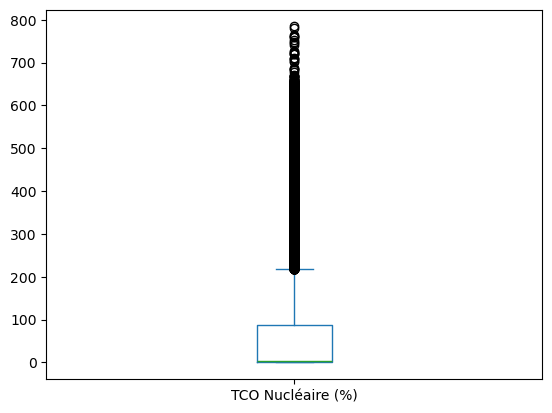

In [134]:
data_FINAL["TCO Nucléaire (%)"].plot(kind='box')

<Axes: ylabel='Density'>

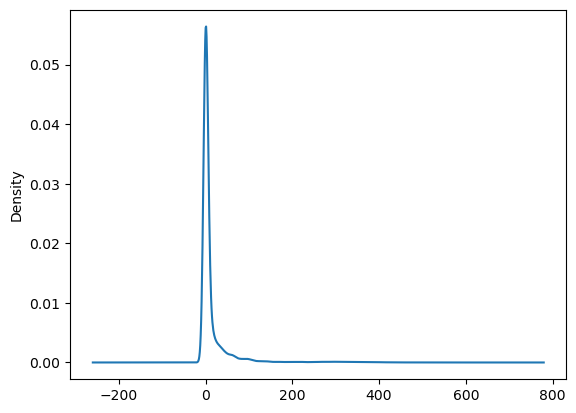

In [154]:
data_FINAL["TCO Nucléaire (%)"][:100000].plot(kind='density')

In [156]:
print(f"Nous disposons de {data_FINAL.shape[0]} données unitaires en pourcentages porté sur le TCO Nucléaire. \n\
Les données vont de {data_FINAL['TCO Nucléaire (%)'].min()}% à {data_FINAL['TCO Nucléaire (%)'].max()}% avec pour \
moyenne {np.round(data_FINAL_mediane)}%\n\n\
\
50% des données sont en dessous d'un TCO de {data_FINAL_mediane}%,\n\
25% moins d'un TCO de  {data_FINAL_Q1}% et 25% plus d'un TCO de {data_FINAL_Q3}%.\n\
50% des données sont compris entre un TCO de {data_FINAL_Q1}% et de {data_FINAL_Q3}%\n\n\
\
cependant les TCO sont très dispercés par rapport à la moyenne (disperssion_moy={np.round(data_FINAL_dispersion_moyenne)}%>50%)\n\
et par rapport à la mediane (disperssion_med={np.round(data_FINAL_dispersion_mediane)}%>50%) ")


Nous disposons de 1980288 données unitaires en pourcentages porté sur le TCO Nucléaire. 
Les données vont de 0.0% à 784.25% avec pour moyenne 5.0%

50% des données sont en dessous d'un TCO de 4.52%,
25% moins d'un TCO de  0.0% et 25% plus d'un TCO de 87.49%.
50% des données sont compris entre un TCO de 0.0% et de 87.49%

cependant les TCO sont très dispercés par rapport à la moyenne (disperssion_moy=167.0%>50%)
et par rapport à la mediane (disperssion_med=2068.0%>50%) 
